In [116]:
#-*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor # 회귀트리(모델)
from sklearn.model_selection import train_test_split # train/test
from sklearn.metrics import mean_squared_error # 평균제곱오차
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [117]:
#데이터가져오기
data1 = pd.DataFrame(pd.read_csv("./italian_testdata.csv"))
data1 = data1.rename(columns ={"건물수량(kg/ha)":"건물수량"})
indx = data1[data1['연도'] <= 1999].index
data1 = data1.drop(indx)
data1.drop(['지역','품종','번호','연도'], axis='columns', inplace=True)
data1.rename(columns = {"건물수량":"quantity",
                        "연평균기온": "average_annual_tem",
                        "최저기온":"low_annual_tem", 
                        "최고기온":"high_annual_tem",
                        "고온일수":"Num_of_heatwaves",
                        "연속고온지속일수":"Num_of_consecutive_heatwaves",
                        "강수량":"precipitation_volume"}, inplace=True)

107 27


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

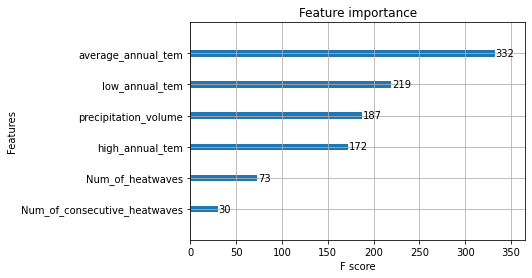

In [118]:
X = data1[['average_annual_tem', 'low_annual_tem', 'high_annual_tem', 'Num_of_heatwaves', 'Num_of_consecutive_heatwaves', 'precipitation_volume']]
y = data1['quantity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

xgb_model = xgboost.XGBRegressor(n_estimators=50, learning_rate=0.08, gamma=3, subsample=0.75,
                           colsample_bytree=1, max_depth=15)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)
xgboost.plot_importance(xgb_model)

In [119]:
y_pred = xgb_model.predict(X_test)
y_true = y_test
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
print(mae,mse)
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)

2168.4837782118057 9802812.199132945
0.9456669275512748


In [120]:
#데이터가져오기
data2 = pd.DataFrame(pd.read_csv("./rye_testdata.csv"))
data2 = data2.rename(columns ={"건물수량(kg/ha)":"건물수량"})
indx = data2[data2['연도'] <= 1999].index
data2 = data2.drop(indx)
data2.drop(['지역','품종','번호','연도'], axis='columns', inplace=True)
data2.rename(columns = {"건물수량":"quantity",
                        "연평균기온": "average_annual_tem",
                        "최저기온":"low_annual_tem", 
                        "최고기온":"high_annual_tem",
                        "고온일수":"Num_of_heatwaves",
                        "연속고온지속일수":"Num_of_consecutive_heatwaves",
                        "강수량":"precipitation_volume"}, inplace=True)

65 17


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

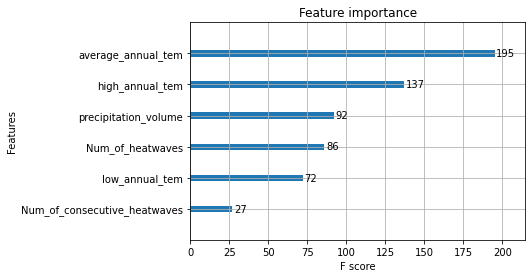

In [121]:
X = data2[['average_annual_tem', 'low_annual_tem', 'high_annual_tem', 'Num_of_heatwaves', 'Num_of_consecutive_heatwaves', 'precipitation_volume']]
y = data2['quantity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgboost.XGBRegressor(n_estimators=50, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)
xgboost.plot_importance(xgb_model)

In [122]:
y_pred = xgb_model.predict(X_test)
y_true = y_test
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
print(mae,mse)
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)

1449.3565314797795 3390603.4229148836
0.9058265673447754


In [123]:
#데이터가져오기
data3 = pd.DataFrame(pd.read_csv("./forage_barley_testdata.csv"))
data3 = data3.rename(columns ={"건물수량(kg/ha)":"건물수량"})
indx = data3[data3['연도'] <= 1999].index
data3 = data3.drop(indx)
data3.drop(['지역','품종','번호','연도'], axis='columns', inplace=True)
data3.rename(columns = {"건물수량":"quantity",
                        "연평균기온": "average_annual_tem",
                        "최저기온":"low_annual_tem", 
                        "최고기온":"high_annual_tem",
                        "고온일수":"Num_of_heatwaves",
                        "연속고온지속일수":"Num_of_consecutive_heatwaves",
                        "강수량":"precipitation_volume"}, inplace=True)

47 12


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

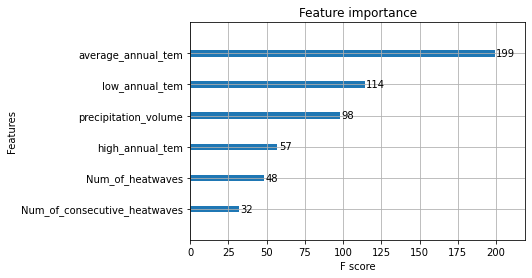

In [124]:
X = data3[['average_annual_tem', 'low_annual_tem', 'high_annual_tem', 'Num_of_heatwaves', 'Num_of_consecutive_heatwaves', 'precipitation_volume']]
y = data3['quantity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgboost.XGBRegressor(n_estimators=50, learning_rate=0.08, gamma=3, subsample=0.75,
                           colsample_bytree=1, max_depth=15)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)
xgboost.plot_importance(xgb_model)

In [125]:
y_pred = xgb_model.predict(X_test)
y_true = y_test
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
print(mae,mse)
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)

2148.3148600260415 6661102.65583841
0.8734045162459183


In [126]:
#데이터가져오기
data4 = pd.DataFrame(pd.read_csv("./pasture_grass_testdata.csv"))
data4 = data4.rename(columns ={"건물수량(kg/ha)":"건물수량"})
indx = data4[data4['연도'] <= 1999].index
data4 = data4.drop(indx)
data4.drop(['지역','품종','번호','연도'], axis='columns', inplace=True)
data4.rename(columns = {"건물수량":"quantity",
                        "연평균기온": "average_annual_tem",
                        "최저기온":"low_annual_tem", 
                        "최고기온":"high_annual_tem",
                        "고온일수":"Num_of_heatwaves",
                        "연속고온지속일수":"Num_of_consecutive_heatwaves",
                        "강수량":"precipitation_volume"}, inplace=True)

181 46


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

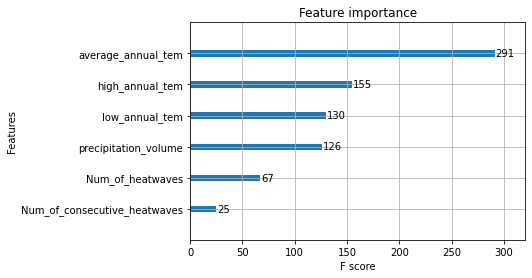

In [127]:
X = data4[['average_annual_tem', 'low_annual_tem', 'high_annual_tem', 'Num_of_heatwaves', 'Num_of_consecutive_heatwaves', 'precipitation_volume']]
y = data4['quantity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgboost.XGBRegressor(n_estimators=50, learning_rate=0.08, gamma=3, subsample=0.75,
                           colsample_bytree=1, max_depth=15)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)
xgboost.plot_importance(xgb_model)

In [128]:
y_pred = xgb_model.predict(X_test)
y_true = y_test
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
print(mae,mse)
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)

1580.4107719089675 5274881.409511079
0.6394462735506636


In [129]:
#데이터가져오기
data5 = pd.DataFrame(pd.read_csv("./corn_testdata.csv", encoding="UTF-8"))
data5 = data5.rename(columns ={"건물수량(kg/ha)":"건물수량"})
indx = data5[data5['연도'] <= 1999].index
data5 = data5.drop(indx)
data5.drop(['지역','품종','번호','연도'], axis='columns', inplace=True)
data5.rename(columns = {"건물수량":"quantity",
                        "연평균기온": "average_annual_tem",
                        "최저기온":"low_annual_tem", 
                        "최고기온":"high_annual_tem",
                        "고온일수":"Num_of_heatwaves",
                        "연속고온지속일수":"Num_of_consecutive_heatwaves",
                        "강수량":"precipitation_volume"}, inplace=True)

349 88


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

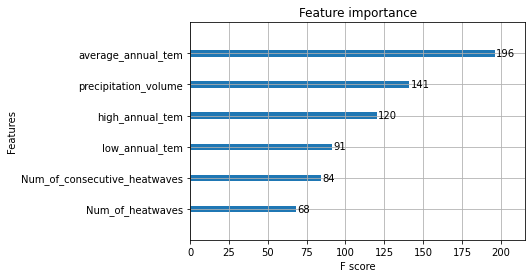

In [130]:
X = data5[['average_annual_tem', 'low_annual_tem', 'high_annual_tem', 'Num_of_heatwaves', 'Num_of_consecutive_heatwaves', 'precipitation_volume']]
y = data5['quantity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgboost.XGBRegressor(n_estimators=50, learning_rate=0.08, gamma=3, subsample=0.75,
                           colsample_bytree=1, max_depth=15)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)
xgboost.plot_importance(xgb_model)

In [131]:
y_pred = xgb_model.predict(X_test)
y_true = y_test
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
print(mae,mse)
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)

1808.5982111150568 5096052.705284509
0.8078164014847176
